This notebook is used for generating different benchmark

In [7]:
from utils import convert_bytes
from payload_generator import generate_spectrum_pb, generate_spectrum_utf
from plots import plot_payload_size, plot_deserialisation_time
from producer import produce

## Spectrum

#### Payload Size

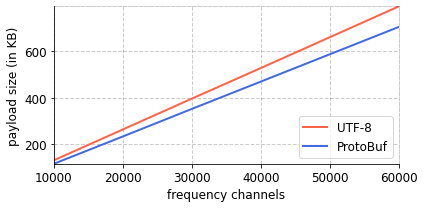

In [8]:
x = []
y1 = []
y2 = []
unit = "KB"

pb_payloads = []
utf_payloads = []

for i in range(10000, 70000, 10000):
    x.append(i)

    payload, size = generate_spectrum_utf(i)
    y1.append(convert_bytes(size, unit))
    utf_payloads.append([payload])

    paylaod, size = generate_spectrum_pb(i)
    y2.append(convert_bytes(size, unit))
    pb_payloads.append(paylaod)

plot_payload_size(x, y1, y2, unit)


#### Deserialization Time

In [9]:
from time import sleep

# for d in pb_payloads:
#     await produce(d, "spectrum-pb")
#     sleep(5)


await produce(pb_payloads[0], "spectrum-pb")

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7f5a4cae7a60>


produce: sent, response = RecordMetadata(topic='spectrum-pb', partition=0, topic_partition=TopicPartition(topic='spectrum-pb', partition=0), offset=184, timestamp=1644421016406, timestamp_type=0)


Task was destroyed but it is pending!
task: <Task pending name='Task-33' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.8/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f5a06eba790>()]> cb=[Sender._fail_all()]>


### Deserialisation Cost

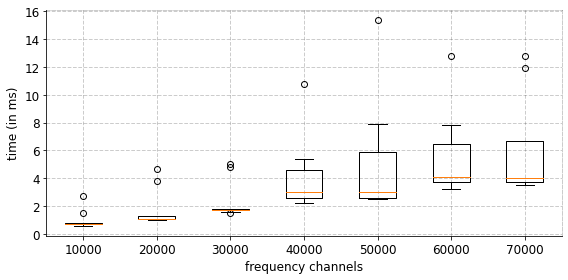

In [4]:

data_1 = [2.699999999254942, 1.5, 0.7000000011175871, 0.8000000007450581, 0.6000000014901161, 0.7999999988824129, 0.6999999992549419, 0.6999999992549419, 0.6999999992549419]
data_2 = [3.800000000745058, 4.699999999254942, 1.200000001117587, 1.299999998882413, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1.099999999627471, 1]
data_3 = [4.800000000745058, 5, 1.700000001117587, 1.800000000745058, 1.6000000014901161, 1.700000001117587, 1.5, 1.699999999254942, 1.699999999254942]
data_4 = [10.800000000745058, 3, 5.400000000372529, 2.599999999627471, 3.300000000745058, 2.599999999627471, 4.600000001490116, 2.200000001117587, 2.900000000372529]
data_5 = [15.400000000372529, 7.900000000372529, 5.900000000372529, 2.5, 3.5, 2.599999999627471, 2.599999999627471, 2.899999998509884, 3]
data_6 = [12.799999998882413, 7.800000000745058, 6.5, 4.099999999627471, 3.199999999254942, 3.699999999254942, 3.5, 3.700000001117587, 4.400000000372529]
data_7 = [12.800000000745058, 11.900000000372529, 6.699999999254942, 3.699999999254942, 4, 3.599999999627471, 4.300000000745058, 3.5, 3.900000000372529]

y = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]
x = [10000, 20000, 30000, 40000, 50000, 60000, 70000]

plot_deserialisation_time(y, x)

### Spectrogram

### Windmap

### Misc